<a href="https://colab.research.google.com/github/mehrnaz1368/classification/blob/main/KMean_clustering2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df=pd.read_csv("Book3.csv")
df.head()

,Province,P,POP,GDP,Br
0,Azarbayjan Gharbi,3.65,4.81,3.4,4.7
1,Azarbayjan Sharghi,2.27,4.10,1.9,3.7
2,Esfahan,5.90,6.36,5.6,4.9
3,Alborz,2.84,3.48,3.0,2.1
4,Khorasan Razavi,5.61,8.20,4.9,4.7


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X = df[["P", "POP", "GDP", "Br"]]

In [15]:
df[["P1", "POP1", "GDP1", "Br1"]]=StandardScaler().fit_transform(df[["P", "POP", "GDP", "Br"]])

In [16]:
B=df[["P1", "POP1", "GDP1", "Br1"]]

In [17]:
K=3
# select random observation as a centriod
Centroids = (B.sample(n=K))

In [18]:
Centroids

,P1,POP1,GDP1,Br1
4,0.352378,1.616263,0.394793,0.566487
30,-0.207850,-0.564156,-0.271096,-0.388719
11,-0.321670,-0.547909,-0.477751,-0.388719


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

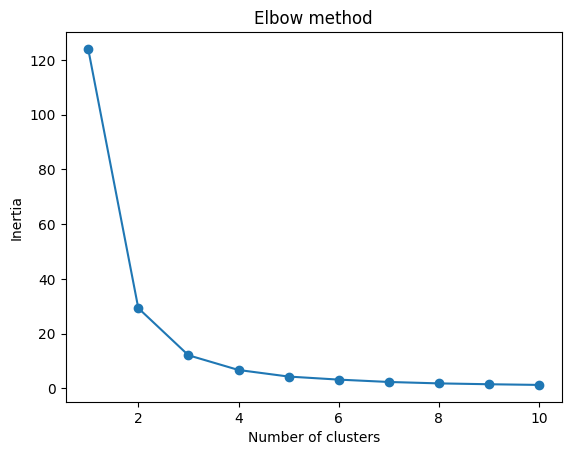

In [19]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(B)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [20]:
import random
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
clusterNum=3
k_means=KMeans(init="k-means++", n_clusters=clusterNum, n_init=12)
k_means.fit(B)
labels=k_means.labels_
print(labels)

[2 0 2 0 2 2 0 2 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
B["Clus_km"]=labels
B.head(5)

<ipython-input-21-09e43f283d04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B["Clus_km"]=labels


,P1,POP1,GDP1,Br1,Clus_km
0,0.062656,0.514680,0.050368,0.566487,2
1,-0.141333,0.283965,-0.294058,0.199100,0
2,0.395245,1.018354,0.555525,0.639964,2
3,-0.057077,0.082496,-0.041479,-0.388719,0
4,0.352378,1.616263,0.394793,0.566487,2


In [22]:
B.groupby('Clus_km').mean()

,P1,POP1,GDP1,Br1
Clus_km,,,,
0,-0.270919,-0.398838,-0.346678,-0.339734
1,5.354521,4.378344,4.321242,5.011867
2,0.191257,0.865627,0.666506,0.523625


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'sum of squared errors')

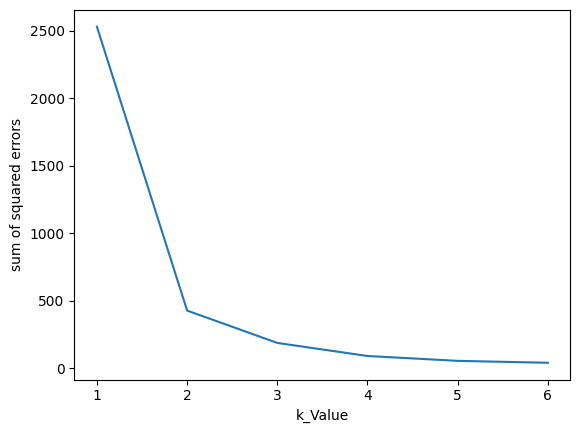

In [7]:
k = range(1,7)
sum_squared_errors=[]
for i in k:
  model=KMeans(n_clusters=i)
  model.fit_predict(X)
  sum_squared_errors.append(model.inertia_)

plt.plot(k,sum_squared_errors)
plt.xlabel('k_Value')
plt.ylabel('sum of squared errors')